In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn.model_selection import train_test_split


random.seed(123) 
np.random.seed(123) 

In [ ]:
df=pd.read_csv("merged_dataset.csv",engine="python", sep=",") 
y=df["Is.Fraudulent"].values.copy()
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42,stratify=y)
# df_test.to_csv("testData.csv", index=False)
df=df_train

In [8]:
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,source,browser,sex,Payment.Method,Product.Category,Quantity,Device.Used,Address.Match
166592,2024-03-03 00:27:27,171.98,12,0,356,0,SEO,IE,M,PayPal,home & garden,2,mobile,1
50425,2015-08-26 20:33:33,71.00,33,0,62,20,Ads,Chrome,F,debit card,electronics,3,mobile,1
21786,2015-05-02 23:03:23,28.00,30,0,9,23,SEO,IE,M,debit card,health & beauty,5,desktop,1
108859,2024-01-08 11:01:40,155.15,21,0,235,11,Ads,Chrome,F,debit card,toys & games,1,mobile,1
195708,2015-06-30 21:00:17,24.00,19,0,38,21,SEO,IE,F,credit card,health & beauty,2,desktop,0


In [9]:
df.describe()

,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,Quantity,Address.Match
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,132.227654,33.840733,0.072010,117.790462,11.418076,3.004110,0.898619
std,213.642353,9.397406,0.258504,100.580938,6.947102,1.415868,0.301833
min,9.000000,-8.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,27.000000,0.000000,40.000000,5.000000,2.000000,1.000000
50%,53.000000,33.000000,0.000000,87.000000,11.000000,3.000000,1.000000
75%,153.092500,40.000000,0.000000,178.000000,17.000000,4.000000,1.000000
max,8329.900000,79.000000,1.000000,365.000000,23.000000,5.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210000 entries, 166592 to 226296
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    210000 non-null  object 
 1   Transaction.Amount  210000 non-null  float64
 2   Customer.Age        210000 non-null  int64  
 3   Is.Fraudulent       210000 non-null  int64  
 4   Account.Age.Days    210000 non-null  int64  
 5   Transaction.Hour    210000 non-null  int64  
 6   source              210000 non-null  object 
 7   browser             210000 non-null  object 
 8   sex                 210000 non-null  object 
 9   Payment.Method      210000 non-null  object 
 10  Product.Category    210000 non-null  object 
 11  Quantity            210000 non-null  int64  
 12  Device.Used         210000 non-null  object 
 13  Address.Match       210000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 24.0+ MB


In [11]:
df.isnull().sum()

Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Is.Fraudulent         0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
sex                   0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Address.Match         0
dtype: int64

array([[<Axes: title={'center': 'Transaction.Amount'}>,
        <Axes: title={'center': 'Customer.Age'}>,
        <Axes: title={'center': 'Is.Fraudulent'}>],
       [<Axes: title={'center': 'Account.Age.Days'}>,
        <Axes: title={'center': 'Transaction.Hour'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Address.Match'}>, <Axes: >, <Axes: >]],
      dtype=object)

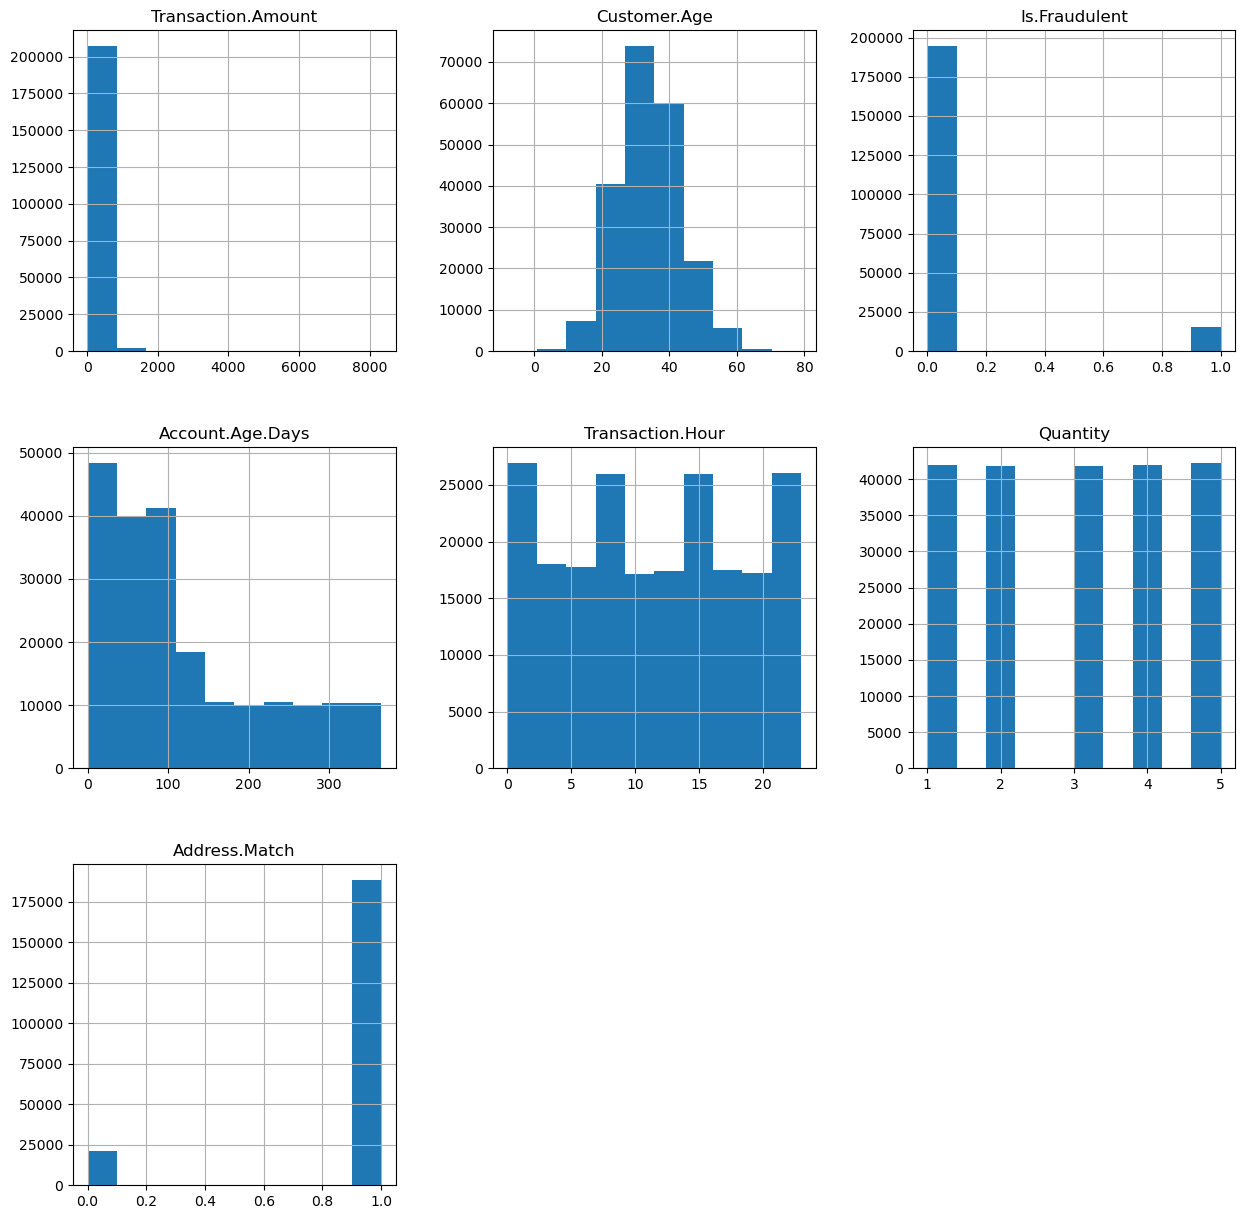

In [21]:
df.hist(figsize=(15,15))

In [4]:
NUMERIC=["Transaction.Amount",'Customer.Age','Account.Age.Days','Quantity']
CATEGORICAL = [x for x in df.columns if x not in NUMERIC]

#### CATEGORICAL

<Axes: >

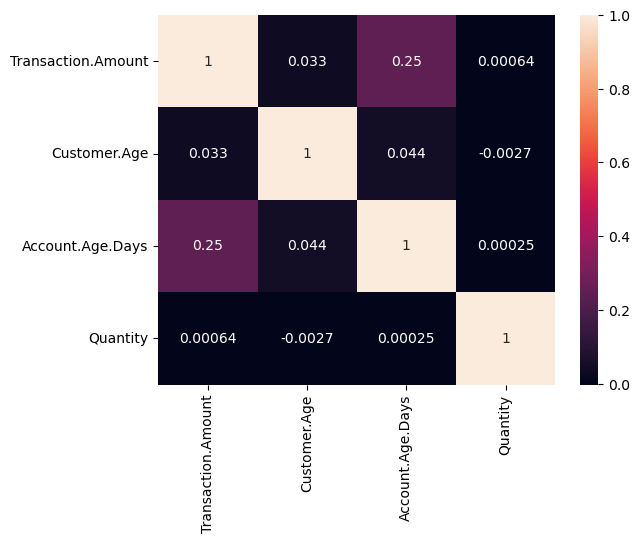

In [26]:
sns.heatmap(df[NUMERIC].corr(), annot=True)

<Axes: xlabel='Device.Used', ylabel='Count'>

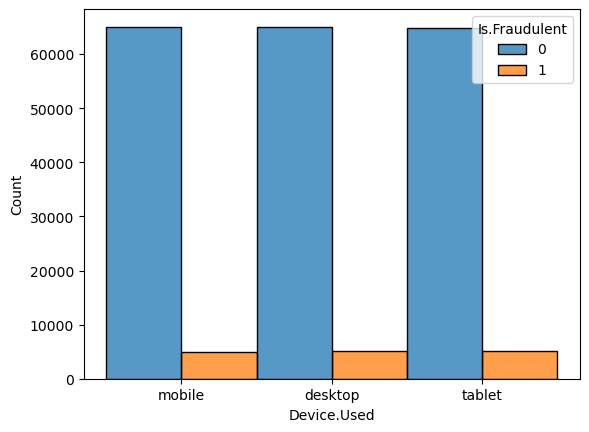

In [ ]:
sns.histplot(data=df, x="Device.Used", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='Payment.Method', ylabel='Count'>

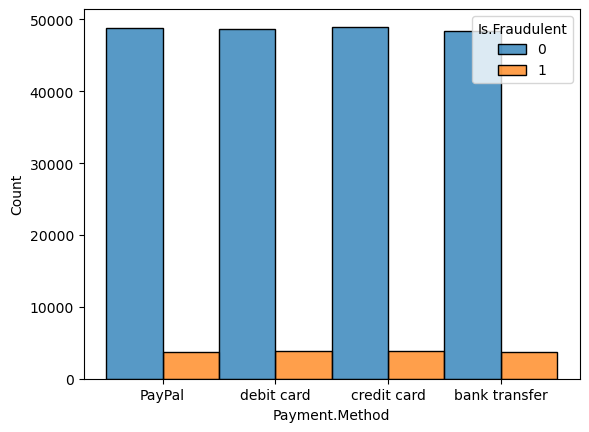

In [ ]:
sns.histplot(data=df, x="Payment.Method", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='browser', ylabel='Count'>

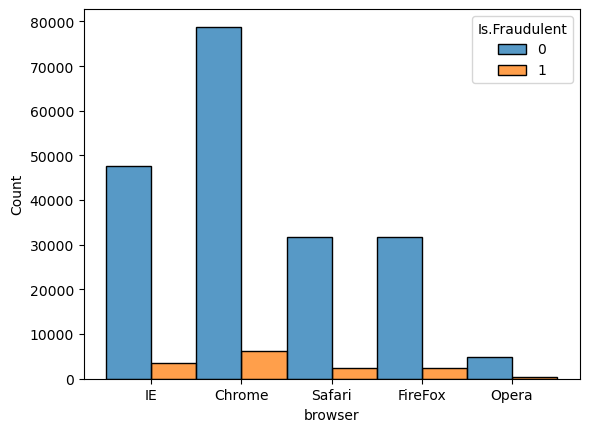

In [ ]:
sns.histplot(data=df, x="browser", hue="Is.Fraudulent", multiple="dodge") # might be because chrome most popular?

<Axes: xlabel='Transaction.Hour', ylabel='Count'>

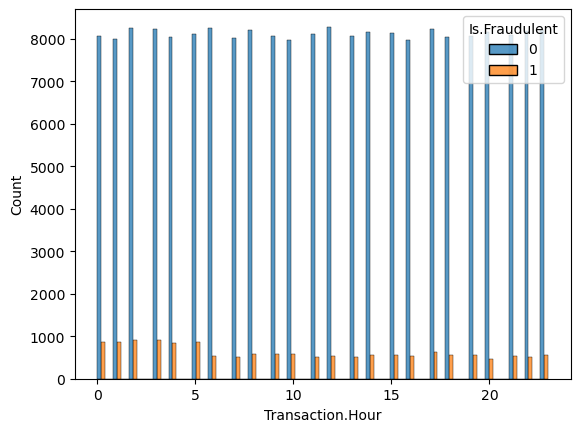

In [ ]:
sns.histplot(data=df, x="Transaction.Hour", hue="Is.Fraudulent", multiple="dodge") # hour seems to matter

### NUMERIC

In [27]:
temp=df.groupby(["Is.Fraudulent"])["Account.Age.Days"].mean() #MOST PREDICIVE FEATURE
temp

Is.Fraudulent
0    122.400173
1     58.384870
Name: Account.Age.Days, dtype: float64

In [171]:
temp=df.groupby(["Is.Fraudulent"])["Transaction.Amount"].median()
temp

Is.Fraudulent
0    54.0
1    47.0
Name: Transaction.Amount, dtype: float64

<Axes: xlabel='Quantity', ylabel='Count'>

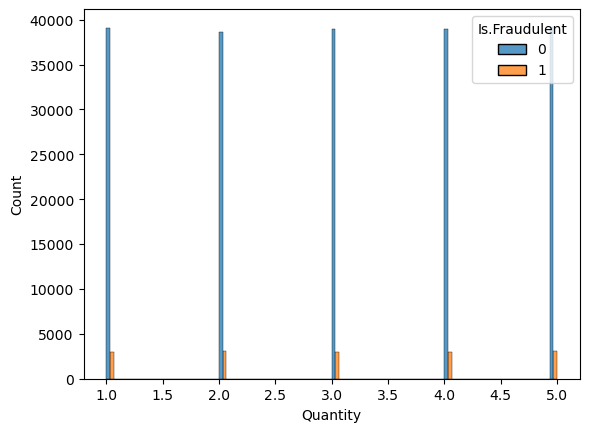

In [29]:
sns.histplot(data=df,x="Quantity",hue="Is.Fraudulent",multiple="dodge") #Nothing fancy

<Axes: xlabel='Customer.Age', ylabel='Count'>

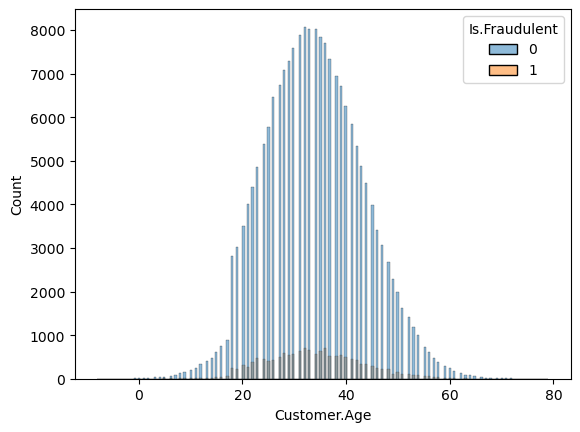

In [30]:
sns.histplot(data=df,x="Customer.Age",hue="Is.Fraudulent") 

In [ ]:
df['Transaction.Date']

166592    2024-03-03 00:27:27
50425     2015-08-26 20:33:33
21786     2015-05-02 23:03:23
108859    2024-01-08 11:01:40
195708    2015-06-30 21:00:17
                 ...         
141388    2015-12-03 03:39:29
137307    2015-05-13 01:45:22
161762    2024-02-27 07:55:35
67915     2015-03-24 20:15:23
226296    2015-03-04 23:46:08
Name: Transaction.Date, Length: 210000, dtype: object

In [31]:
df["month"]=df["Transaction.Date"].apply(lambda x : float(x[5:7]) if x[5]!=0 else float(x[6:7]) )
df["day"]=df["Transaction.Date"].apply(lambda x : float(x[8:10]) if x[8]!=0 else float(x[9:10])) 

<Axes: xlabel='day', ylabel='Count'>

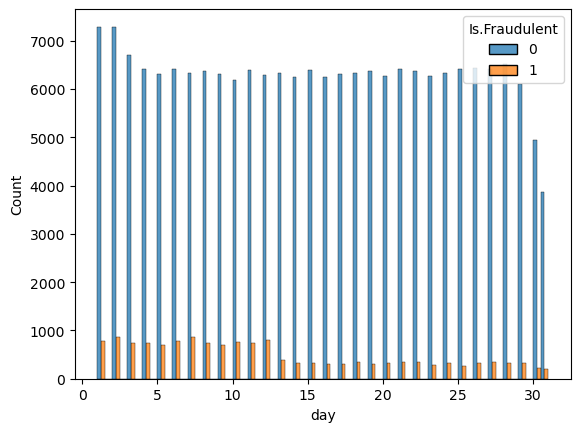

In [37]:
sns.histplot(df, x="day", hue="Is.Fraudulent", multiple="dodge") #seems in first part of months there are more frauds

In [43]:
maximalSplit=0
output=0
for i in range(1,31):
    df["partOfMonth"]=df["day"].apply(lambda x: "First" if x<=i else "Second") 
    temp1=df.loc[(df["partOfMonth"]=="First") & df["Is.Fraudulent"]==1].shape[0]/df.loc[(df["partOfMonth"]=="First")].shape[0] #fraud rate
    if temp1>maximalSplit: 
        maximalSplit=temp1 
        output=i
print(output,maximalSplit) # thus 12 best split

12 0.10511642786956422


In [44]:
df["partOfMonth"]=df["day"].apply(lambda x: "First" if x<=12 else "Second")

<Axes: xlabel='partOfMonth', ylabel='Count'>

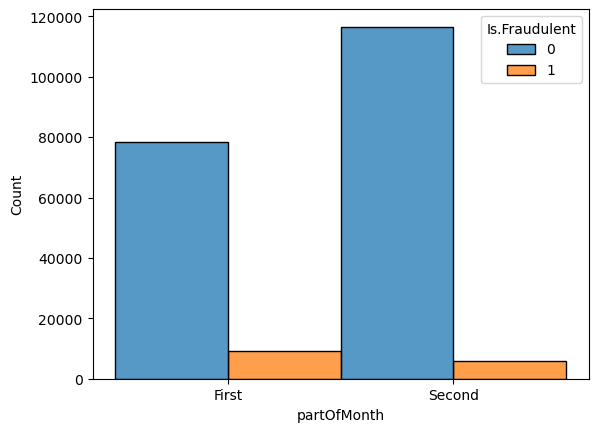

In [45]:
sns.histplot(data=df,x="partOfMonth",hue="Is.Fraudulent",multiple="dodge" ) 

In [49]:
# Convert Month to Sinusoidal Representation
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Convert Hour to Sinusoidal Representation
df["hour_sin"] = np.sin(2 * np.pi * df["Transaction.Hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["Transaction.Hour"] / 24)

df["hour_angle"] = np.arctan2(df["hour_sin"], df["hour_cos"])
df["month_angle"]=np.arctan2(df["month_sin"],df["month_cos"]) 

In [60]:
df.loc[:,["Transaction.Hour", "hour_angle"]].drop_duplicates().sort_values(by="Transaction.Hour").round(2)

,Transaction.Hour,hour_angle
166592,0,0.00
296113,1,0.26
76976,2,0.52
124277,3,0.79
161347,4,1.05
238930,5,1.31
239896,6,1.57
149994,7,1.83
75720,8,2.09
203853,9,2.36


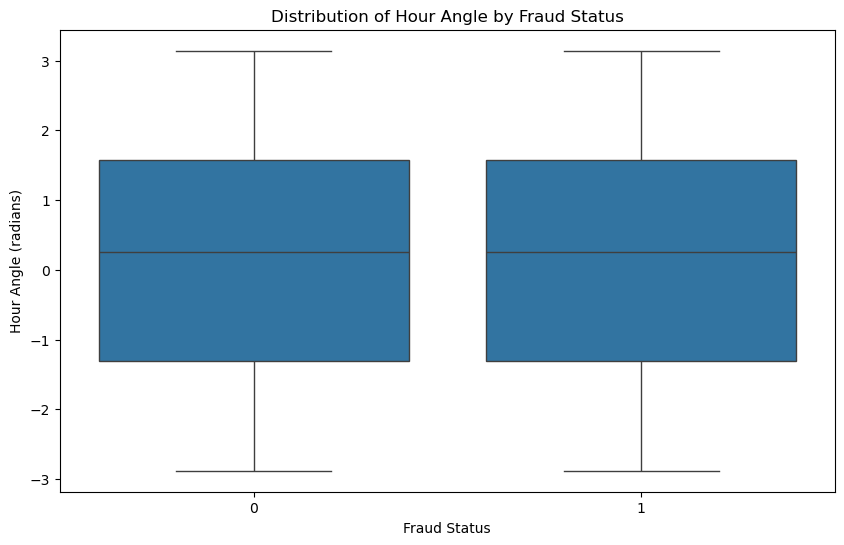

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is.Fraudulent', y='hour_angle')
plt.title('Distribution of Hour Angle by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Hour Angle (radians)')
plt.show()

In [59]:
df.loc[:,["month", "month_angle"]].drop_duplicates().sort_values(by="month").round(2)

,month,month_angle
108859,1.0,0.52
253256,2.0,1.05
166592,3.0,1.57
54858,4.0,2.09
21786,5.0,2.62
195708,6.0,3.14
222018,7.0,-2.62
50425,8.0,-2.09
125178,9.0,-1.57
125429,10.0,-1.05


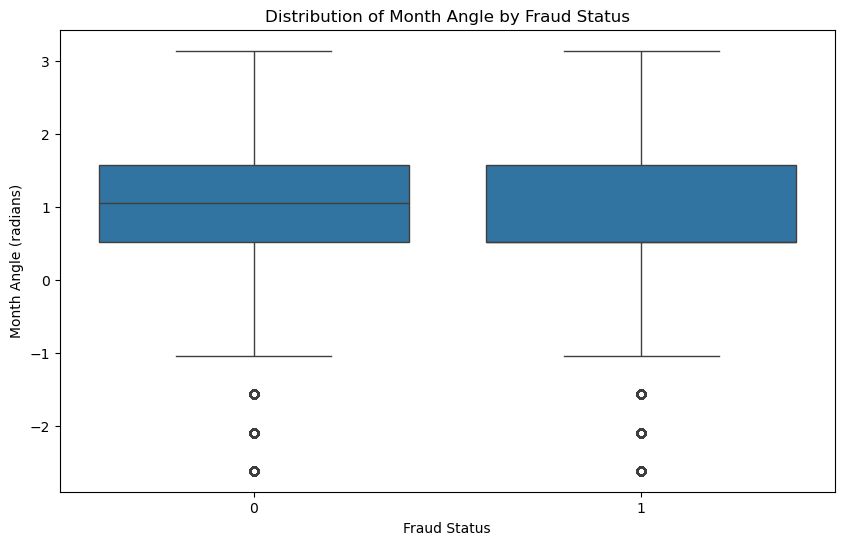

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is.Fraudulent', y='month_angle')
plt.title('Distribution of Month Angle by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Month Angle (radians)')
plt.show()

#### MINOR

In [ ]:
df["Is.Minor"]=df["Customer.Age"].apply(lambda x : True if x<18 else False) 

In [65]:
sum(df["Is.Fraudulent"])/df.shape[0] * 100 #percentage of minor

7.200952380952382

In [67]:
df.loc[(df["Is.Minor"] == 1) & (df["Is.Fraudulent"] == 1)].shape[0]/df.loc[df["Is.Minor"]==1].shape[0] #percentage of frauds in minors

0.05337255725992856

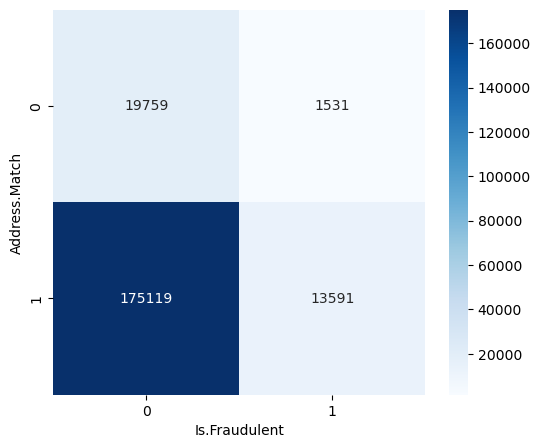

In [69]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"]) #matching address

plt.figure(figsize=(6, 5))
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt="d")
plt.show()

<Axes: xlabel='Is.Fraudulent', ylabel='Address.Match'>

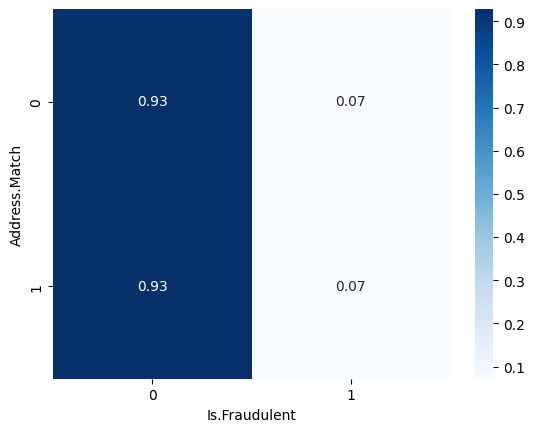

In [ ]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"], normalize="index") #???
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt=".2f")

#### HIGH AMOUNT

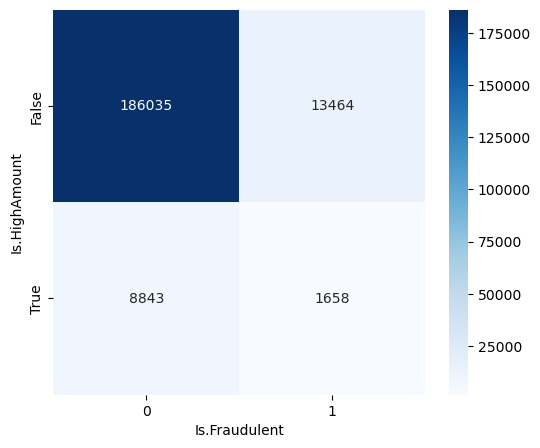

In [71]:
#NOTHING FANCY
HighAmountInt=df["Transaction.Amount"].quantile(0.95)
df["Is.HighAmount"]=df["Transaction.Amount"].apply(lambda x : True if x>=HighAmountInt else False) 

binary_crosstab = pd.crosstab(df["Is.HighAmount"], df["Is.Fraudulent"])

plt.figure(figsize=(6, 5))
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt="d")
plt.show()

<Axes: xlabel='Transaction.Weekday', ylabel='Count'>

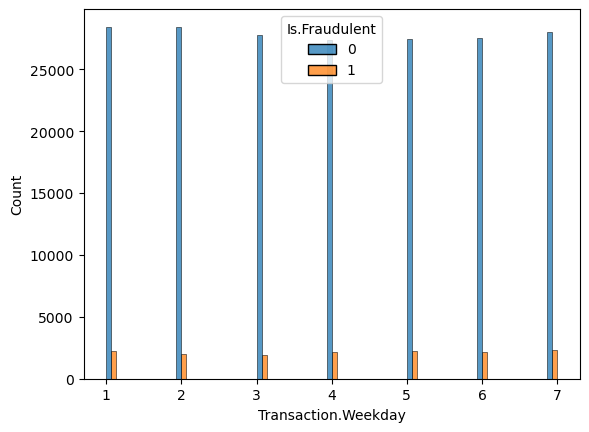

In [77]:
# DAY OF THE WEEK 
df["Transaction.Date"] = pd.to_datetime(df["Transaction.Date"], format = "ISO8601")  # Ensure it's in datetime format
df["Transaction.Weekday"] = df["Transaction.Date"].dt.weekday + 1  # 1 = Monday, 7 = Sunday
sns.histplot(data=df,x="Transaction.Weekday",hue="Is.Fraudulent",multiple="dodge") 

In [80]:
#PERHAPS?
for i in range(1, 8): 
    fraud_count = df.loc[(df["Transaction.Weekday"] == i) & (df["Is.Fraudulent"] == 1)].shape[0]
    total_count = df.loc[df["Transaction.Weekday"] == i].shape[0]
    
    fraud_rate = fraud_count / total_count if total_count > 0 else 0  

    print(f"{i}-th day: {fraud_rate:.4f} fraud rate")

1-th day: 0.0740 fraud rate
2-th day: 0.0648 fraud rate
3-th day: 0.0658 fraud rate
4-th day: 0.0730 fraud rate
5-th day: 0.0764 fraud rate
6-th day: 0.0738 fraud rate
7-th day: 0.0763 fraud rate
